In [ ]:
#OK

In [2]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

using DifferentialEquations
using Plots
using CSV
using DataFrames
using LookupTable
using .JuliaMBD
using .JuliaMBD.Diagram

In [3]:
@model front_damper begin
    df = CSV.read("damper_rate.csv", DataFrame)
    @parameter begin
        d_Fr_sus_fric_gain=10000
        d_Fr_sus_fric=40
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "front_damper")
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "eelRdIJvC0ySnhr88J11-29", "parent" => "eelRdIJvC0ySnhr88J11-25", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JJKL5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "eelRdIJvC0ySnhr88J11-30", "parent" => "eelRdIJvC0ySnhr88J11-25", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JJKL5/src/diagrams/_xml2model.jl:76


front_damper (generic function with 1 method)

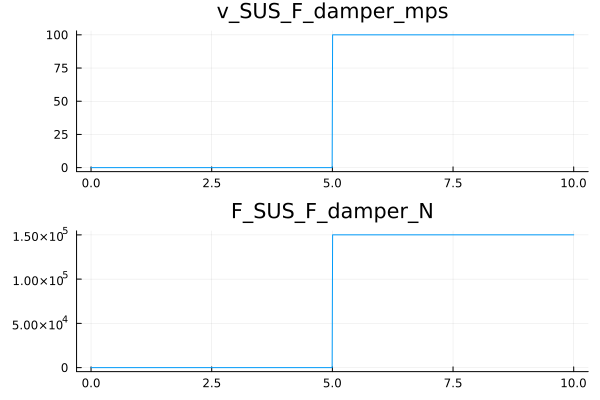

In [4]:
@model TestFront_damper begin
    @block begin
        m = front_damper()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_SUS_F_damper_mps
    end
    @scope begin
        m.v_SUS_F_damper_mps => v_SUS_F_damper_mps
        m.F_SUS_F_damper_N => F_SUS_F_damper_N
    end
end

m = @compile TestFront_damper() 
res = simulate(m, tspan=[0, 10])
plot(res)

In [7]:
@buildxml "susF.xml" front_damper

1612

In [13]:
@model SUS_F_PNT begin
    @parameter begin
        L_ratio_Fr_sus = 1.2048
        z_k_Fr_sus_ini = 0.10755
        K_Fr_sus = 30690
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "SUS_F_PNT")
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "alvLlJ6tzEGBFmDSwJj--6", "parent" => "alvLlJ6tzEGBFmDSwJj--1", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JJKL5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "mOL21seqj4cdgwPASDr6-9", "parent" => "mOL21seqj4cdgwPASDr6-5", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JJKL5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "alvLlJ6tzEGBFmDSwJj--5", "parent" => "alvLlJ6tzEGBFmDSwJj--1", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JJKL5/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br

SUS_F_PNT (generic function with 1 method)

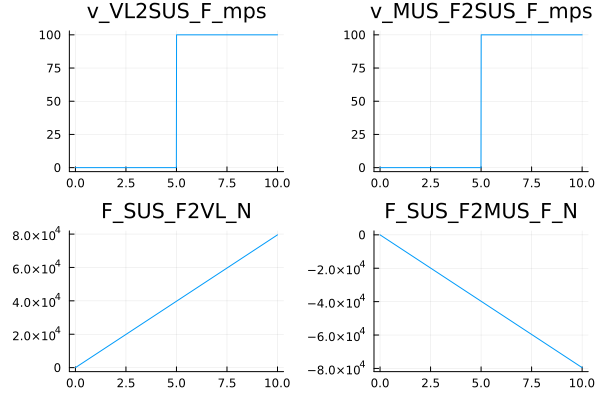

In [15]:
@model TestSUS_F_PNT begin
    @block begin
        m = SUS_F_PNT()
        s1 = Step(steptime=5, finalvalue=100)
    end
    @connect begin
        s1.out => m.v_VL2SUS_F_mps
        s1.out => m.v_MUS_F2SUS_F_mps
    end
    @scope begin
        m.v_VL2SUS_F_mps => v_VL2SUS_F_mps
        m.v_MUS_F2SUS_F_mps => v_MUS_F2SUS_F_mps
        m.F_SUS_F2VL_N => F_SUS_F2VL_N
        m.F_SUS_F2MUS_F_N => F_SUS_F2MUS_F_N
    end
end

m = @compile TestSUS_F_PNT() 
res = simulate(m, tspan=[0, 10])
plot(res, layout=(2,2))